<a href="https://colab.research.google.com/github/Prajwal011/Games-using-python/blob/main/Flight_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl==3.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.2
    Uninstalling openpyxl-3.1.2:
      Successfully uninstalled openpyxl-3.1.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
final_df = pd.read_csv('flights.csv')
final_df.head()

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
final_df=final_df.drop("Unnamed: 0",axis=1)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
# Splitting date, month, year
final_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
13349     6
13350    27
13351     6
13352     6
13353    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [ ]:
# Feature Engineering Process
# Assigning columns to each Date, Month and Year

final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
# Alternatively, we can use lambda function as well

# df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [ ]:
# Converting datatype of new columns to be int

final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.4+ MB


In [ ]:
#final_df.drop('Date_of_Journey', inplace=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [ ]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]

# We can also use lambda function
# final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x: x.split(' ').str[0])

In [ ]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [ ]:
# Checking if there is any null value

final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [ ]:
# Splitting arrival time to hour and minutes

#final_df['Arrival_Hour'] = final_df['Arrival_Time'].str.split(':').str[0]

final_df['Arrival_Hour'] = final_df['Arrival_Time'].apply(lambda k: k.split(':')[0])
final_df['Arrival_Min'] = final_df['Arrival_Time'].apply(lambda k: k.split(':')[1])

In [ ]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [ ]:
# Converting the datatype of Arrival hour and minute column to int

final_df['Arrival_Hour'] = final_df['Arrival_Hour'].astype(int)
final_df['Arrival_Min'] = final_df['Arrival_Min'].astype(int)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
 14  Arrival_Hour     13354 non-null  int64  
 15  Arrival_Min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 1.6+ MB


In [ ]:
final_df.drop('Arrival_Time', axis=1, inplace=True)

In [ ]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [ ]:
# Splitting Departure time to hour and minutes

final_df['Dep_Hour'] = final_df['Dep_Time'].str.split(':').str[0].astype(int)
final_df['Dep_Min'] = final_df['Dep_Time'].str.split(':').str[1].astype(int)

In [ ]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_Hour     13354 non-null  int64  
 14  Arrival_Min      13354 non-null  int64  
 15  Dep_Hour         13354 non-null  int64  
 16  Dep_Min          13354 non-null  int64  
dtypes: float64(1

In [ ]:
final_df.drop('Dep_Time', axis=1, inplace=True)
final_df.drop('Route', axis=1, inplace=True)
final_df.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'nan':1})

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df['Duration_Hour'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [ ]:
to_drop=final_df[final_df['Duration_Hour']=='5m']
to_drop

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [ ]:
final_df.drop(to_drop.index, axis=0, inplace=True)

In [ ]:
final_df['Duration_Hour'] = final_df['Duration_Hour'].astype(int)

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [ ]:
final_df['Duration_Min'] = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [ ]:
final_df['Duration_Min'] = final_df['Duration_Min'].fillna(0)

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [ ]:
#final_df['Duration_Min'] = final_df['Duration_Min'].map({'Nan':0})

In [ ]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
final_df['Duration_Min'] = final_df['Duration_Min'].astype(int)

In [ ]:
final_df['Duration_Hour'] = final_df['Duration_Hour'] * 60

In [ ]:
#final_df['Total_Duration'] = final_df['Duration_Hour'].agg({final_df['Duration_Hour'] : lambda k: sum(int(x) for x in k)})

In [ ]:
data1_df = final_df.groupby('Airline').sum('Total_Duration')
data1_df

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
Airline,,,,,,,,,,,
Air Asia,188.0,1783293.0,5603,1916,817695,4863,13030,5676,16590,125880,14740
Air India,2733.0,16821514.0,28099,10073,4421610,32105,59255,26772,50125,2017140,60010
GoAir,123.0,1137045.0,3243,1120,484560,3461,8880,2864,8400,62040,8820
IndiGo,1069.0,11648071.0,34675,11785,5176716,32120,66155,31345,61095,660120,82640
Jet Airways,4823.0,44817461.0,62738,22729,9582174,62521,110910,63709,118380,3898080,125730
Jet Airways Business,9.0,350152.0,17,24,16152,90,220,88,290,2700,230
Multiple carriers,1613.0,13039603.0,21923,7556,3115317,22422,26155,15614,29305,930540,34950
Multiple carriers Premium economy,16.0,148445.0,336,48,32304,246,410,132,385,9300,445
SpiceJet,180.0,3548717.0,14253,4816,2071494,11408,25705,12676,31360,150480,31305


In [ ]:
#final_df['Total_Duration'] = final_df['Total_Duration'].astype(int)

In [ ]:
#duration_df = final_df.groupby('Airline').agg({'Duration' : lambda k: sum([int(x) for x in k])}).sort_values(by='Duration', ascending=False)

In [ ]:
airline_df = final_df.groupby('Airline').sum().sort_values('Price', ascending=False)
airline_df.head()

<ipython-input-48-204a6eb1314c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline_df = final_df.groupby('Airline').sum().sort_values('Price', ascending=False)


,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
Airline,,,,,,,,,,,
Jet Airways,4823.0,44817461.0,62738,22729,9582174,62521,110910,63709,118380,3898080,125730
Air India,2733.0,16821514.0,28099,10073,4421610,32105,59255,26772,50125,2017140,60010
Multiple carriers,1613.0,13039603.0,21923,7556,3115317,22422,26155,15614,29305,930540,34950
IndiGo,1069.0,11648071.0,34675,11785,5176716,32120,66155,31345,61095,660120,82640
Vistara,271.0,3734451.0,7860,2813,1227552,9532,18385,8119,11110,343380,19395


Text(0, 0.5, 'Airlines')

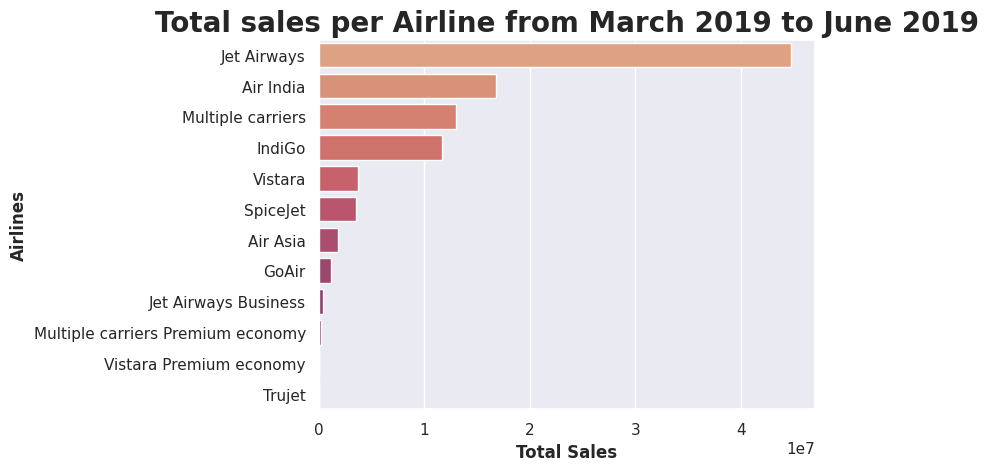

In [ ]:
#plt.figure(figsize=[15,8])
sns.set_theme(style='darkgrid')
plt.title("Total sales per Airline from March 2019 to June 2019", size=20, weight='heavy')

sns.barplot(x='Price', y=airline_df.index, data=airline_df, orient='h', palette='flare')
plt.xlabel("Total Sales", size=12, weight='heavy')
plt.ylabel("Airlines", size=12, weight='heavy')

In [ ]:
final_df['Month'].unique()

array([3, 5, 6, 4])

In [ ]:
final_df['Month_Name'] = final_df['Month'].map({3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June'})

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Month_Name
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50,March
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25,May
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0,June
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25,May
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45,March


In [ ]:
year2019_df = final_df.groupby('Month_Name').sum().sort_values(by='Price', ascending=True)
year2019_df

<ipython-input-63-7ca2a58897a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year2019_df = final_df.groupby('Month_Name').sum().sort_values(by='Price', ascending=True)


,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Stops
Month_Name,,,,,,,,,,,,
April,537.0,6226744.0,14603,5308,2679213,17597,36255,17100,32330,462180,42445,1327.0
March,2974.0,29056485.0,46985,10230,6884790,45700,92025,40715,92520,2249580,98025,3410.0
June,3793.0,30141510.0,52195,25716,8653434,56939,96775,53310,102505,2665140,117270,4286.0
May,3722.0,31635040.0,65007,21645,8740251,58623,104200,55945,99815,2823540,120725,4328.0


Text(0, 0.5, 'Price')

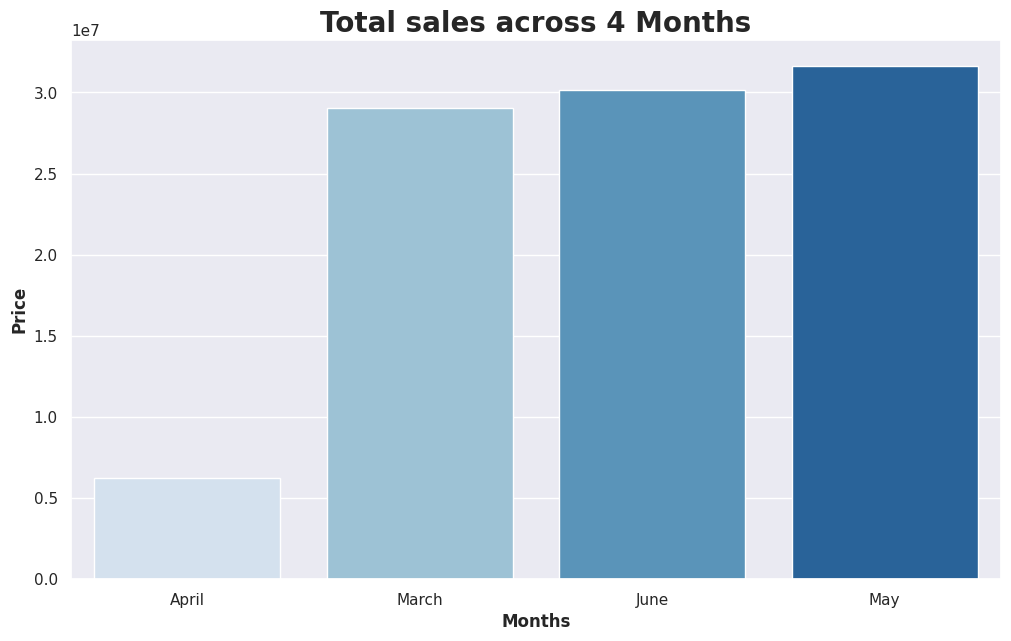

In [ ]:
plt.figure(figsize=[12,7])
sns.set_theme(style='darkgrid')
plt.title("Total sales across 4 Months", size=20, weight='heavy')

sns.barplot(x=year2019_df.index, y=year2019_df.Price, data = year2019_df, palette = 'Blues')
plt.xlabel("Months", size=12, weight='heavy')
plt.ylabel("Price", size=12, weight='heavy')

In [ ]:
final_df['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [ ]:
#final_df['Total_Stops'].astype(int)

In [ ]:
final_df['Stops'] = final_df['Total_Stops'].map({0.0 : 1, 1.0 : 1, 2.0 : 1, 3.0 : 1, 4.0 : 1, 'nan' : 1})

In [ ]:
final_df.tail()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Month_Name,Stops
13349,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,1380,55,June,1.0
13350,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,120,35,March,1.0
13351,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,360,35,March,1.0
13352,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,900,15,March,1.0
13353,Multiple carriers,Delhi,Cochin,14h 20m,1.0,No info,NaN,15,6,2019,19,15,4,55,840,20,June,1.0


In [ ]:
source_df = final_df.groupby('Source').sum().sort_values(by='Total_Stops', ascending=False)
source_df

<ipython-input-60-eee86332c097>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  source_df = final_df.groupby('Source').sum().sort_values(by='Total_Stops', ascending=False)


,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Stops
Source,,,,,,,,,,,,
Delhi,6854.0,47817435.0,81181,27834,11471958,75728,116675,66233,129190,4485840,143665,5681.0
Kolkata,3105.0,26293736.0,44984,17443,7230039,50047,99920,50162,84495,2573940,102905,3581.0
Banglore,931.0,17614369.0,34982,11436,5556288,36117,76765,34361,75260,939600,98945,2752.0
Mumbai,136.0,3509290.0,11346,4010,1778739,11044,26030,10806,23890,146340,24040,881.0
Chennai,0.0,1824949.0,6297,2176,920664,5923,9865,5508,14335,54720,8910,456.0


Text(0, 0.5, 'Stops')

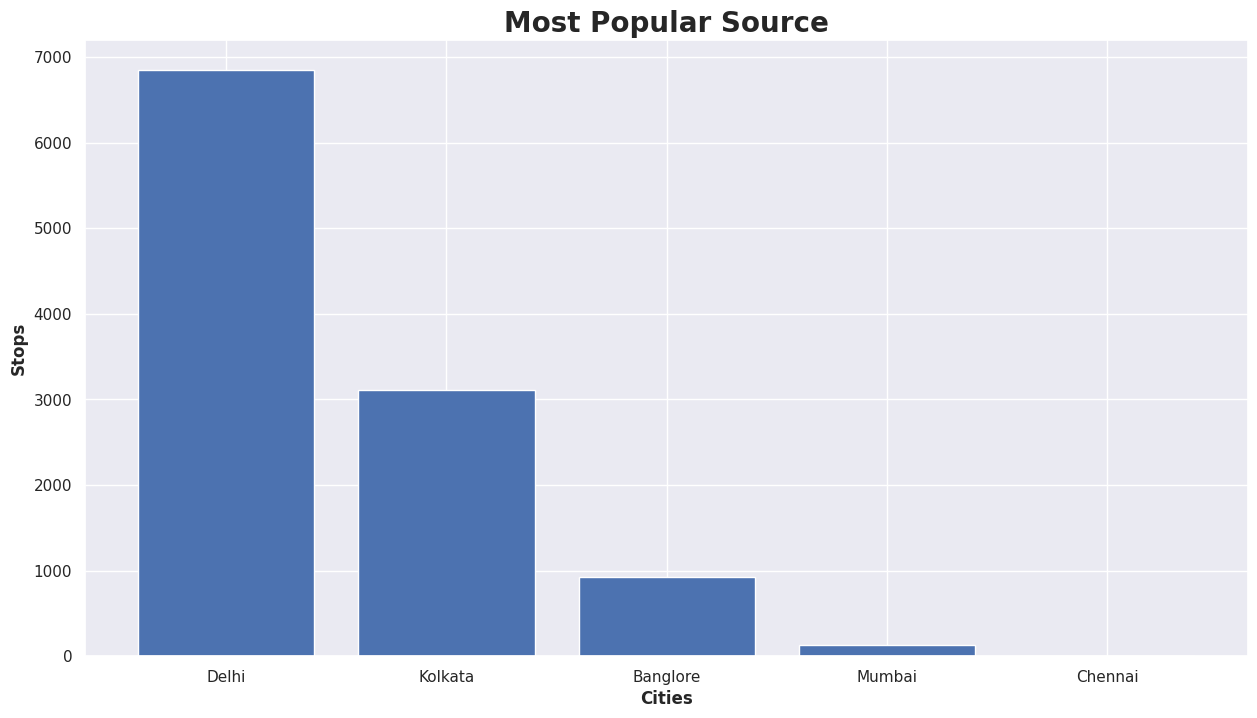

In [ ]:
# Most Popular Sources, flights took off from

plt.figure(figsize=[15,8])
sns.set_theme(style='darkgrid')
plt.title("Most Popular Source", weight='heavy', size=20)

plt.bar(source_df.index, 'Total_Stops', data=source_df)
plt.xlabel("Cities", size=12, weight='heavy')
plt.ylabel("Stops", size=12, weight='heavy')

In [ ]:
destination_df = final_df.groupby('Destination').sum().sort_values(by='Total_Stops', ascending=False)
destination_df

<ipython-input-66-edc503a945a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  destination_df = final_df.groupby('Destination').sum().sort_values(by='Total_Stops', ascending=False)


,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Stops
Destination,,,,,,,,,,,,
Cochin,6854.0,47817435.0,81181,27834,11471958,75728,116675,66233,129190,4485840,143665,5681.0
Banglore,3105.0,26293736.0,44984,17443,7230039,50047,99920,50162,84495,2573940,102905,3581.0
New Delhi,931.0,11107312.0,13470,3510,2362230,15826,30540,14221,36680,728640,38320,1170.0
Hyderabad,136.0,3509290.0,11346,4010,1778739,11044,26030,10806,23890,146340,24040,881.0
Delhi,0.0,6507057.0,21512,7926,3194058,20291,46225,20140,38580,210960,60625,1582.0
Kolkata,0.0,1824949.0,6297,2176,920664,5923,9865,5508,14335,54720,8910,456.0


Text(0, 0.5, 'Stops')

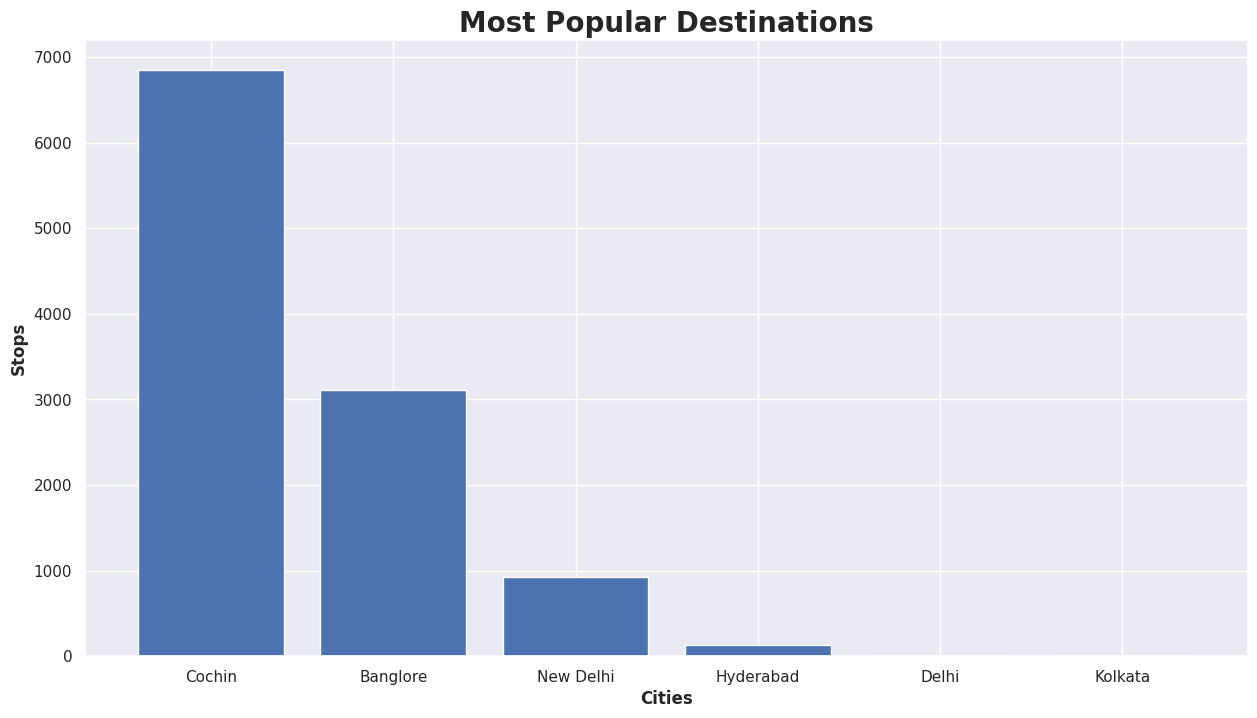

In [ ]:
plt.figure(figsize=[15,8])
sns.set_theme(style='darkgrid')
plt.title("Most Popular Destinations", weight='heavy', size=20)

plt.bar(destination_df.index, 'Total_Stops', data=destination_df)
plt.xlabel("Cities", size=12, weight='heavy')
plt.ylabel("Stops", size=12, weight='heavy')

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Month_Name,Stops
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50,March,1.0
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25,May,1.0
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0,June,1.0
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25,May,1.0
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45,March,1.0


In [ ]:
final_df['Arrival_Hour'].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17])

In [ ]:
arrival_df = final_df.groupby('Arrival_Hour').sum()
arrival_df

<ipython-input-71-456ca9209faf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arrival_df = final_df.groupby('Arrival_Hour').sum()


,Total_Stops,Price,Date,Month,Year,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,Stops
Arrival_Hour,,,,,,,,,,,
0,53.0,1816868.0,5479,1858,829809,9890,8476,8815,76020,12655,411.0
1,690.0,5108851.0,9555,3345,1389072,19440,10499,12210,389760,19530,688.0
2,12.0,406999.0,1213,422,185748,2430,2092,3100,13200,4130,92.0
3,19.0,231928.0,842,294,123159,1595,398,2240,10860,2955,61.0
4,1233.0,9625085.0,13722,4938,2045247,26885,12693,27060,812520,31085,1013.0
5,161.0,1060520.0,1022,423,191805,2025,1080,2105,98520,1900,95.0
6,25.0,301570.0,913,305,129216,3095,374,585,36180,2930,64.0
7,449.0,3268338.0,7019,2431,1045842,18175,4561,13790,314700,16625,518.0
8,282.0,3790227.0,7661,2693,1199286,18990,5543,14575,277800,18995,594.0


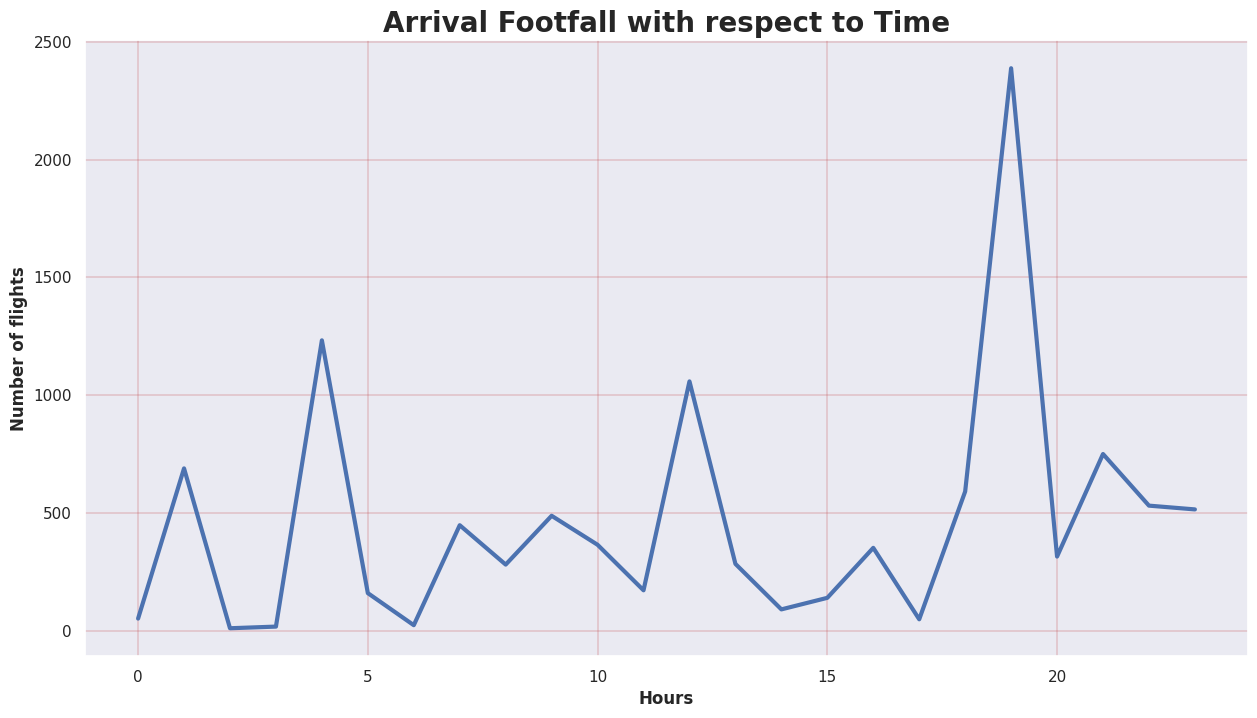

In [ ]:
plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
plt.title("Arrival Footfall with respect to Time", weight='heavy', size=20)

plt.plot(arrival_df.index, 'Total_Stops', data = arrival_df, linewidth=3.0)
plt.xlabel("Hours", weight='heavy', size=12)
plt.ylabel("Number of flights", weight='heavy', size=12)
plt.grid(True, color='r', linewidth=0.3)

In [ ]:
departure_df = final_df.groupby('Dep_Hour').sum()
departure_df

<ipython-input-73-6304d9ed9201>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  departure_df = final_df.groupby('Dep_Hour').sum()


,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Min,Duration_Hour,Duration_Min,Stops
Dep_Hour,,,,,,,,,,,
0,12.0,304603.0,616,213,102969,262,1365,1520,16260,2185,51.0
1,4.0,161121.0,597,201,88836,193,715,1360,6420,1875,44.0
2,143.0,1633475.0,3079,1068,460332,1880,5285,5580,106020,6485,228.0
3,28.0,251391.0,426,162,60570,466,550,1360,20940,810,30.0
4,126.0,1232819.0,2958,982,442161,2617,6120,7995,102660,7125,219.0
5,910.0,6089973.0,10539,3506,1566744,8749,18655,26350,597840,23565,776.0
6,664.0,5712048.0,11481,3977,1742397,10515,23785,22765,518340,26100,863.0
7,861.0,7366129.0,14590,4987,2154273,15301,23160,17390,604200,29890,1067.0
8,786.0,7028076.0,11346,3931,1760568,13419,17765,21400,564660,21325,872.0


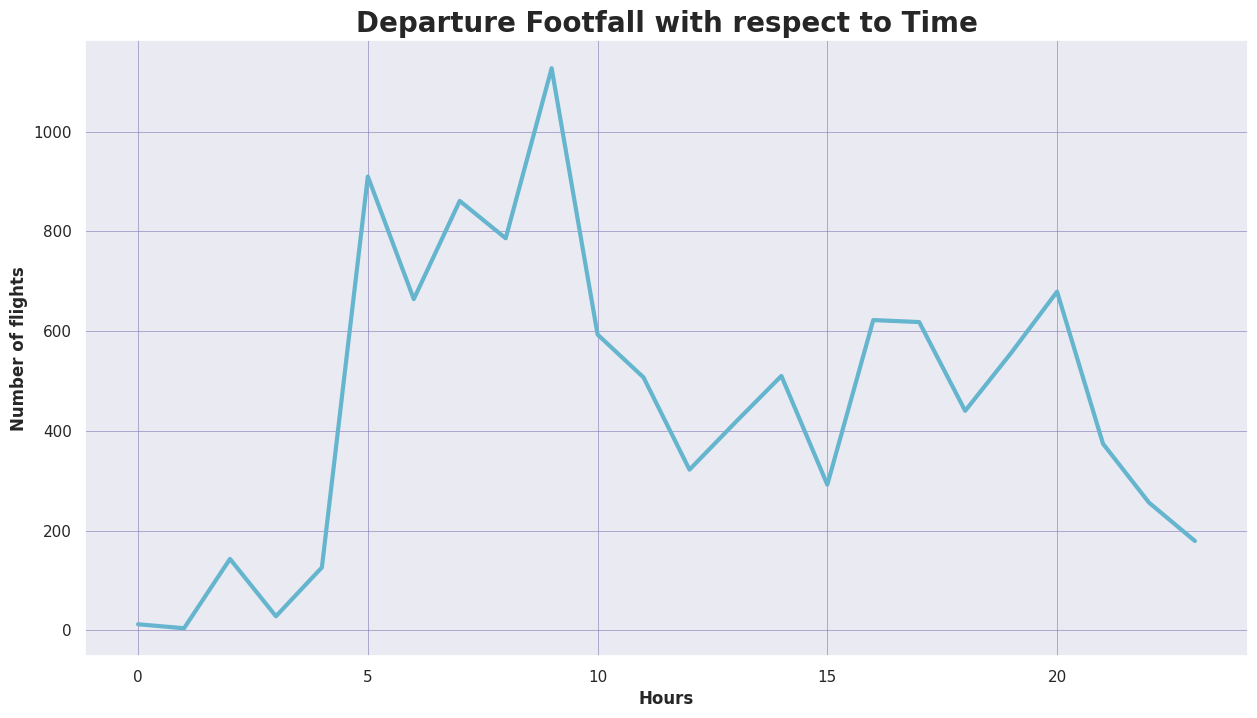

In [ ]:
plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
plt.title("Departure Footfall with respect to Time", weight='heavy', size=20)

plt.plot(departure_df.index, 'Total_Stops', data = departure_df, linewidth=3.0, color='c')
plt.xlabel("Hours", weight='heavy', size=12)
plt.ylabel("Number of flights", weight='heavy', size=12)
plt.grid(True, color='m', linewidth=0.4)

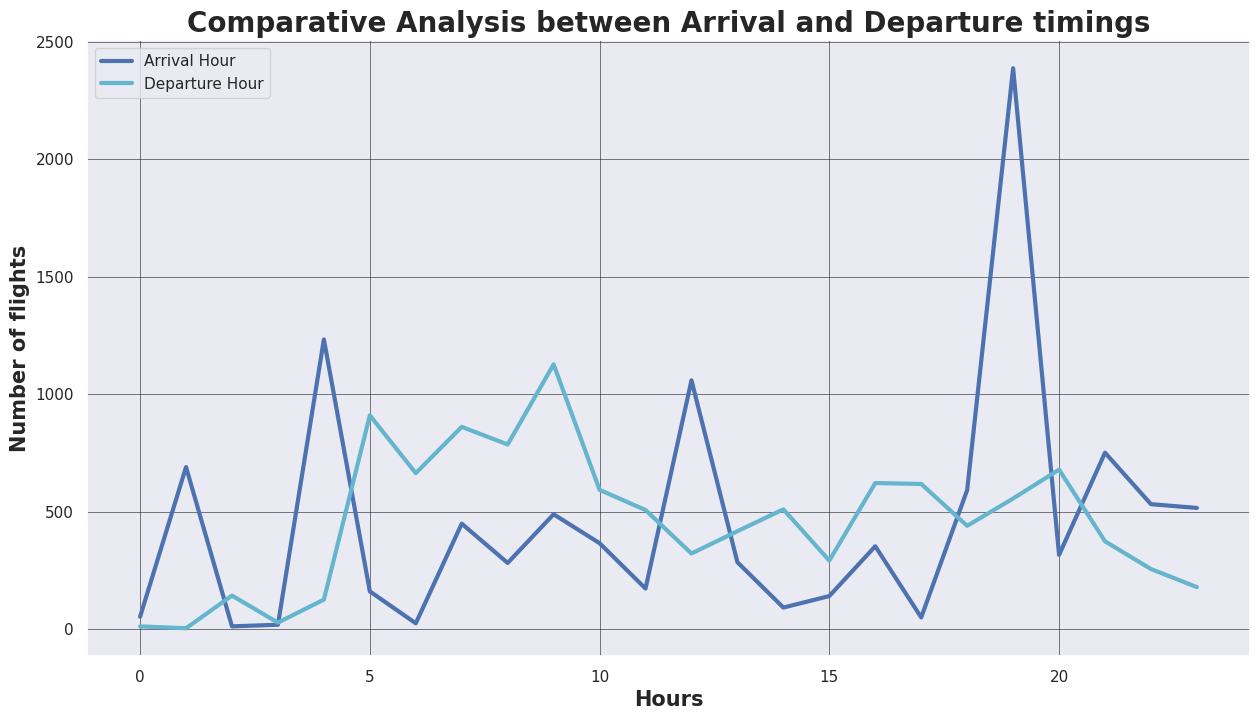

In [ ]:
# Comparative Analysis between arrival and departure timings

plt.figure(figsize=[15,8])
sns.set_theme(style='dark')
plt.title("Comparative Analysis between Arrival and Departure timings", size = 20, weight = 'heavy')

plt.plot(arrival_df.index, 'Total_Stops', data = arrival_df, linewidth=3)
plt.plot(departure_df.index, 'Total_Stops', data = departure_df, linewidth=3, color='c')
plt.xlabel("Hours", weight='heavy', size = 15)
plt.ylabel("Number of flights", weight='heavy', size=15)
plt.legend(["Arrival Hour", "Departure Hour"], loc=2)
plt.grid(True, color='k', linewidth=0.4)

In [ ]:
# # Label Encoding

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
final_df['Airline'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Source'] = labelencoder.fit_transform(final_df['Source'])
final_df['Destination'] = labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = labelencoder.fit_transform(final_df['Additional_Info'])

In [ ]:
# final_df.drop('Duration', axis=1, inplace=True)

In [ ]:
# Get Dummies

pd.get_dummies(final_df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,2h 50m,0.0,3897.0,24,3,2019,1,10,22,20,...,1,0,0,0,0,0,0,0,1,0
1,7h 25m,2.0,7662.0,1,5,2019,13,15,5,50,...,0,0,0,0,0,0,0,0,1,0
2,19h,2.0,13882.0,9,6,2019,4,25,9,25,...,0,0,0,0,0,0,0,0,1,0
3,5h 25m,1.0,6218.0,12,5,2019,23,30,18,5,...,0,0,0,0,0,0,0,0,1,0
4,4h 45m,1.0,13302.0,1,3,2019,21,35,16,50,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,23h 55m,1.0,NaN,6,6,2019,20,25,20,30,...,0,0,0,0,0,0,0,0,1,0
13350,2h 35m,0.0,NaN,27,3,2019,16,55,14,20,...,0,0,0,0,0,0,0,0,1,0
13351,6h 35m,1.0,NaN,6,3,2019,4,25,21,50,...,0,0,0,0,0,0,0,0,1,0
13352,15h 15m,1.0,NaN,6,3,2019,19,15,4,0,...,0,0,0,0,0,0,0,0,1,0
